## 📌 Step 1: Import Required 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt

## 📌 Step 2: Load the Dataset

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\Classification\Naive Bayes(GaussianNB)\ecommerce_dataset.csv")

## 📌 Step 3: View First 5 Rows of Dataset

In [3]:
df.head()

,Customer_Age,Annual_Income,Browsing_Time_Minutes,Pages_Visited,Time_on_App_Minutes,Device_Type,Payment_Method,Discount_Availed,Purchase
0,56,28408,11,21,140,Tablet,PayPal,1,1
1,46,101210,56,11,169,Tablet,PayPal,0,1
2,32,143904,9,5,78,Mobile,Debit Card,1,1
3,60,198678,31,3,172,Tablet,PayPal,1,1
4,25,196926,1,11,18,Desktop,Cash on Delivery,1,1


## 📌 Step 4: Check Dataset Shape

In [4]:
df.shape

(50000, 9)

## 📌 Step 5: Check Unique Classes in Target Column (`Purchase`)

In [5]:
df["Purchase"].unique()

array([1, 0])

## 📌 Step 6: Import LabelEncoder

In [6]:
from sklearn.preprocessing import LabelEncoder

## 📌 Step 7: Apply LabelEncoder

In [7]:
le = LabelEncoder()
df["Device_Type"] = pd.DataFrame(le.fit_transform(df["Device_Type"]))
df["Payment_Method"]=pd.DataFrame(le.fit_transform(df["Payment_Method"]))

## 📌 Step 8: View First 5 Rows of Dataset after apply LabelEncoder

In [8]:
df.head()

,Customer_Age,Annual_Income,Browsing_Time_Minutes,Pages_Visited,Time_on_App_Minutes,Device_Type,Payment_Method,Discount_Availed,Purchase
0,56,28408,11,21,140,2,3,1,1
1,46,101210,56,11,169,2,3,0,1
2,32,143904,9,5,78,1,2,1,1
3,60,198678,31,3,172,2,3,1,1
4,25,196926,1,11,18,0,0,1,1


## 📌 Step 9: Check Missing Values in Dataset

In [9]:
df.isnull().sum()

Customer_Age             0
Annual_Income            0
Browsing_Time_Minutes    0
Pages_Visited            0
Time_on_App_Minutes      0
Device_Type              0
Payment_Method           0
Discount_Availed         0
Purchase                 0
dtype: int64

## 📌 Step 10: Dataset Information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Customer_Age           50000 non-null  int64
 1   Annual_Income          50000 non-null  int64
 2   Browsing_Time_Minutes  50000 non-null  int64
 3   Pages_Visited          50000 non-null  int64
 4   Time_on_App_Minutes    50000 non-null  int64
 5   Device_Type            50000 non-null  int64
 6   Payment_Method         50000 non-null  int64
 7   Discount_Availed       50000 non-null  int64
 8   Purchase               50000 non-null  int64
dtypes: int64(9)
memory usage: 3.4 MB


## 📌 Step 11: Summary Statistics

In [11]:
df.describe()

,Customer_Age,Annual_Income,Browsing_Time_Minutes,Pages_Visited,Time_on_App_Minutes,Device_Type,Payment_Method,Discount_Availed,Purchase
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,40.979240,109510.862060,29.93368,12.486160,90.057520,1.005120,1.495640,0.501840,0.747100
std,13.528733,51986.582056,17.00438,6.931754,51.749589,0.815982,1.119485,0.500002,0.434678
min,18.000000,20002.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,64510.750000,15.00000,6.000000,45.000000,0.000000,0.000000,0.000000,0.000000
50%,41.000000,109327.500000,30.00000,12.000000,90.000000,1.000000,1.000000,1.000000,1.000000
75%,53.000000,154471.500000,45.00000,18.000000,135.000000,2.000000,2.000000,1.000000,1.000000
max,64.000000,199995.000000,59.00000,24.000000,179.000000,2.000000,3.000000,1.000000,1.000000


## 📌 Step 12: Boxplot Visualization

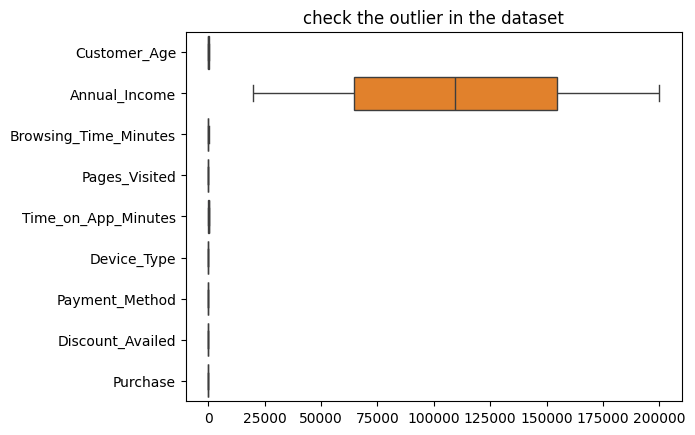

In [12]:
sns.boxplot(data=df,orient='h')
plt.title("check the outlier in the dataset")
plt.show()

## 📌 Step 12: Pairplot Visualization

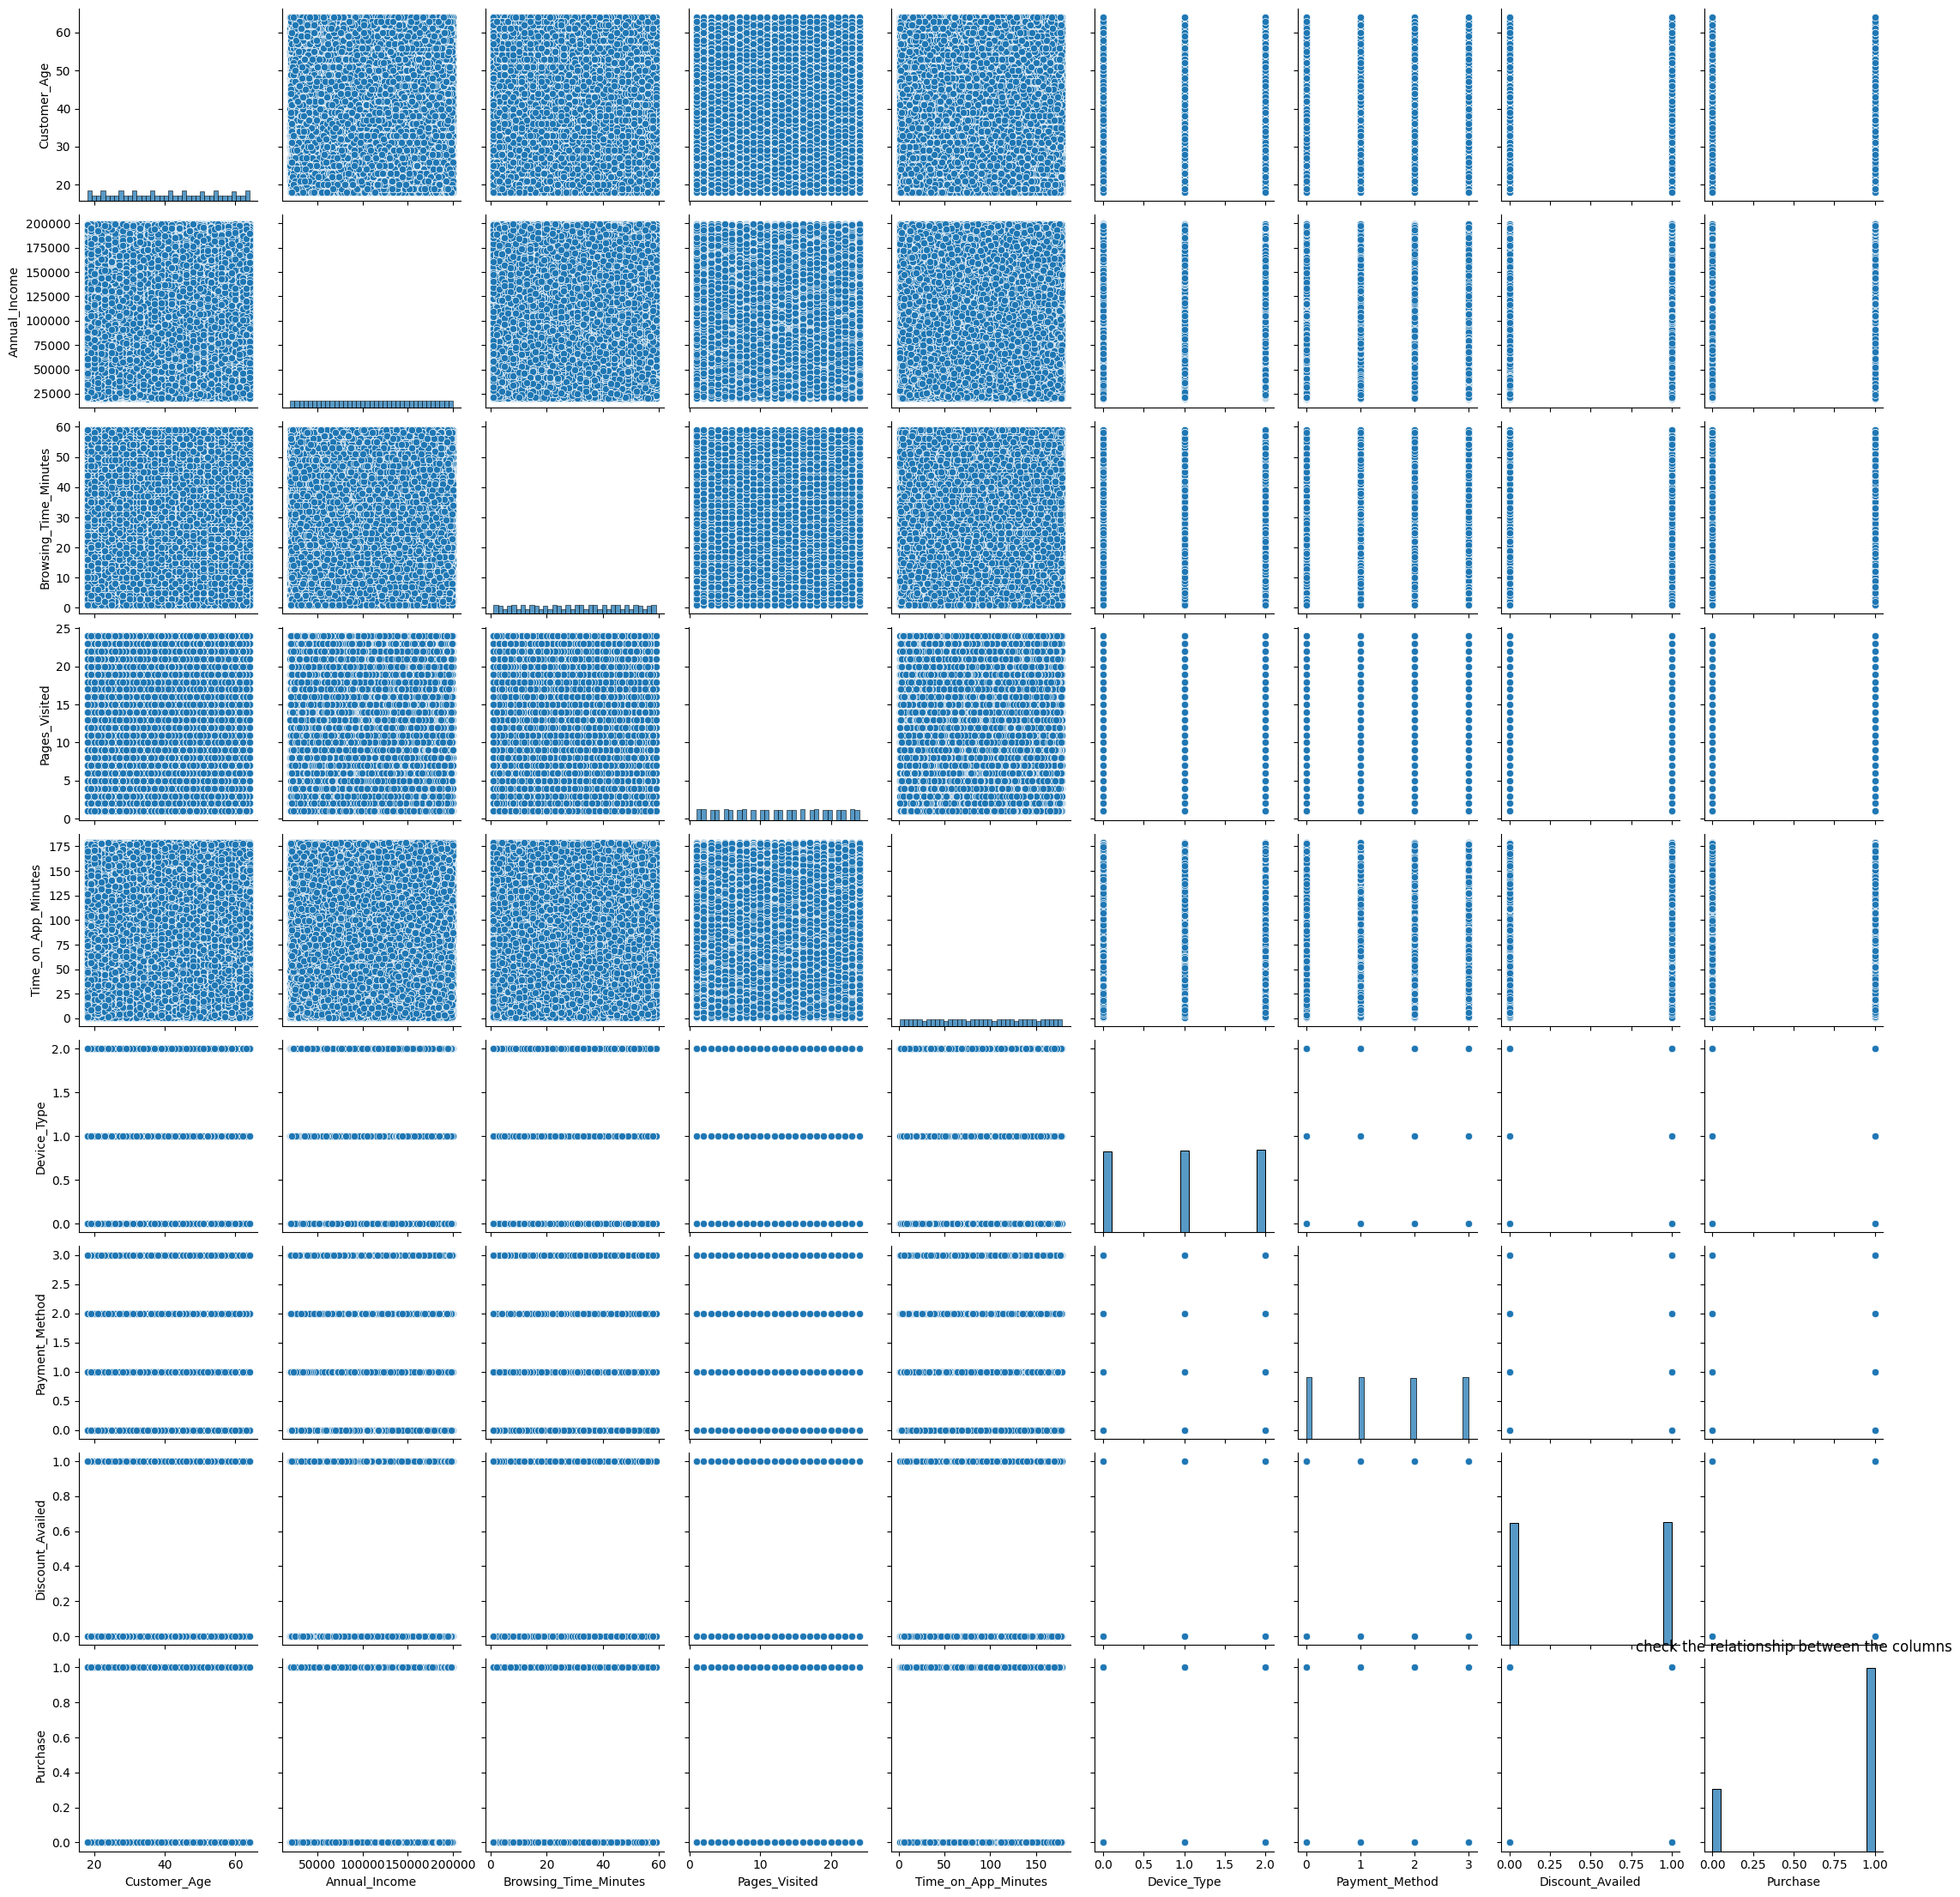

In [13]:
sns.pairplot(data=df)
plt.title("check the relationship between the columns")
plt.show()

## 📌 Step 13: Correlation Heatmap

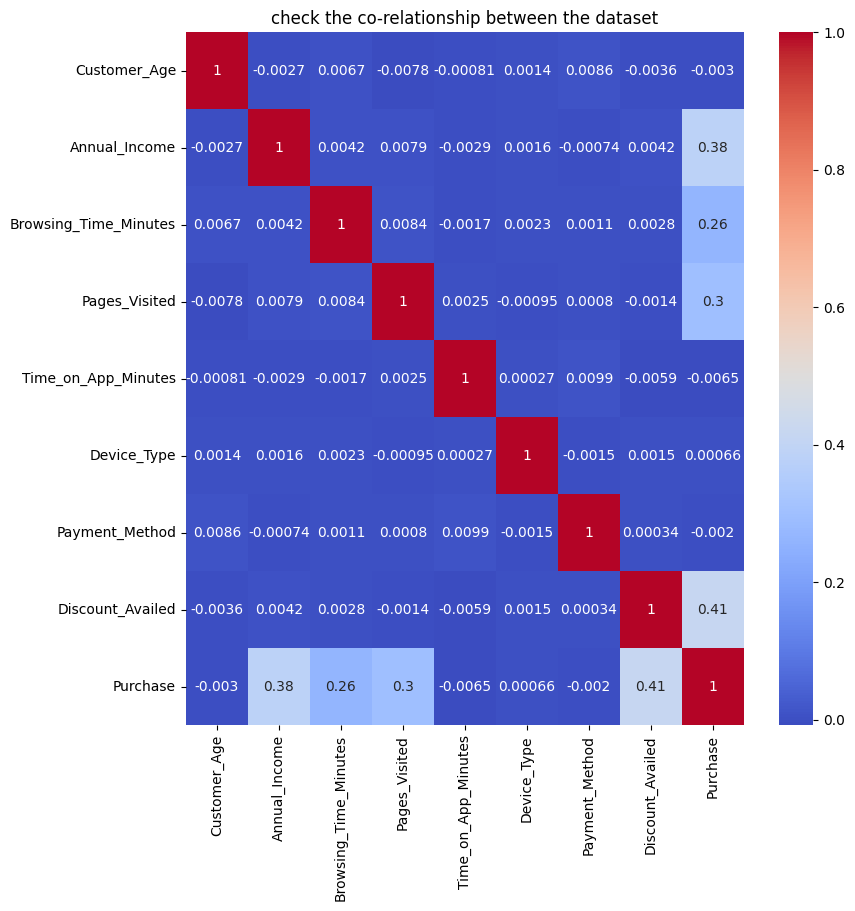

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("check the co-relationship between the dataset")
plt.show()

## 📌 Step 14: Feature and Target Split
- **X (features):** Sare columns except last (Purchase)
- **y (target):** Only species column

In [15]:
x=df.iloc[:,:-1]
y=df["Purchase"]

## 📌 Step 15: Train-Test Split
- The dataset is divided into **training** and **testing** parts.  
- Typically, **70–80%** of the data is used for training, and **20–30%** is used for testing.  


In [16]:
from sklearn.model_selection import train_test_split

## 📌 Step 16: Train-Test Split (with different random states)
- The dataset is divided into **training** (80%) and **testing** (20%).  
- Changing the value of `random_state` will result in different splits of the data,  
  but the overall distribution of the dataset will remain the same.  

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=11) #11

## 📌 Step 17: Import StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler

## 📌 Step 18: Apply StandardScaler

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 📌 Step 19: View x_train value after scalling 

In [20]:
x_train

array([[-1.32770327, -0.96732581,  0.47359838, ...,  1.22029857,
         1.34311031, -1.00586721],
       [ 1.62926198, -1.47506571,  1.70874254, ..., -0.00579328,
         1.34311031,  0.99416701],
       [-0.4406137 , -0.43823678, -0.87917855, ..., -1.23188514,
        -0.44314848, -1.00586721],
       ...,
       [-1.32770327, -0.49550791,  1.53229337, ...,  1.22029857,
         0.44998092, -1.00586721],
       [-1.32770327, -1.08040502, -0.17338189, ..., -0.00579328,
        -1.33627787, -1.00586721],
       [ 1.03786893, -0.7556825 ,  0.59123116, ..., -0.00579328,
        -1.33627787, -1.00586721]], shape=(40000, 8))

## 📌 Step 20: View x_test value after scalling 

In [21]:
x_test

array([[-0.88415848, -0.8410213 ,  0.06188366, ...,  1.22029857,
         1.34311031, -1.00586721],
       [-0.4406137 , -0.56827594, -1.70260799, ..., -1.23188514,
         0.44998092,  0.99416701],
       [ 1.62926198,  1.52039754,  0.76768032, ..., -0.00579328,
         0.44998092, -1.00586721],
       ...,
       [ 0.52040001, -0.17875522,  0.8853131 , ...,  1.22029857,
        -1.33627787, -1.00586721],
       [ 0.07685522,  0.20714635,  1.12057865, ..., -1.23188514,
         1.34311031,  0.99416701],
       [ 0.22470349, -1.67182815,  1.12057865, ..., -1.23188514,
         1.34311031, -1.00586721]], shape=(10000, 8))

## 📌 Step 21: Import naive_bayes  
- Random Forest is an **naive_bayes** that builds multiple decision trees.  
- Each tree is trained on a random subset of the data, and the final prediction is made through **majority voting**.  
- This algorithm is very powerful for classification tasks.  

In [22]:
from sklearn.naive_bayes import GaussianNB

## 📌 Step 22: Initialize & Train Naïve Bayes Classifier  

We initialize the **GaussianNB (Naïve Bayes Classifier)** with the following parameters:  

- **priors=None** → No prior probabilities are specified; class priors are learned from the data automatically.  
- **var_smoothing=1e-9** → Added to the variance of each feature to improve numerical stability and prevent division by zero.  

In [23]:
nb = GaussianNB(
    priors=None,
    var_smoothing=1e-9
)

nb.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


## 📌 Step 23: Model Accuracy (Train vs Test)

- `rfc.score(x_test, y_test)` → Checks the accuracy on the **test dataset**.  
- `rfc.score(x_train, y_train)` → Checks the accuracy on the **training dataset**.  
- We multiply by `*100` to convert the values into percentages.  

✔️ **Test and Train values of this model:** `(87.86 , 87.28)`  

👉 This step helps us check whether the model is **overfitting** or not.  
- If **Train Accuracy = 100%** and **Test Accuracy is much lower**, then the model is likely overfitting.  
- Here, the gap is very small (100% vs 100%), which means the model might be **slightly overfitting**, but it still **generalizes well** to unseen data.  


In [24]:
nb.score(x_test,y_test)*100,nb.score(x_train,y_train)*100

(87.86, 87.28)

## 📌 Step 24: Adding Predictions to the Dataset

We can use our trained **naive bayes** to make predictions on the entire dataset `x` and store the results in a new column.  

In [ ]:
df["prediction"] =nb.predict(x)
df.head()

## 📌 Step 25: Making Predictions on Test Data

Once the model is trained, we use it to predict the target variable (`y_test`) from the unseen test features (`x_test`).

In [26]:
y_pred = nb.predict(x_test)

## 📌 Step 26: Cross-Validation (Model Stability Check)

- We applied **5-Fold Cross Validation** to check the stability and generalization of our Naïve Bayes model.  
- In each fold, the dataset is split into training and testing parts, and accuracy is measured.  

✔️ **Cross Validation Scores (per fold):** `[0.8277, 0.8299, 0.8281, 0.835, 0.8278]`  
✔️ **Mean Accuracy:** `82.97%`  
✔️ **Standard Deviation:** `0.2767`  

👉 Since the scores are very close to each other with a **low standard deviation**, this indicates that our model is **stable and generalizes reasonably well** across different data splits, consistently achieving around **83% accuracy**.  


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
cv_scores = cross_val_score(nb, x, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean()*100)
print("Standard Deviation:", cv_scores.std()*100)

Cross Validation Scores: [0.8277 0.8299 0.8281 0.835  0.8278]
Mean Accuracy: 82.97000000000001
Standard Deviation: 0.27676705006196056


## 📌 Step 27: Import Classification Metrics  

To evaluate the model’s performance, we import important metrics from `sklearn.metrics`:  

- **Confusion Matrix** → To visualize correct vs incorrect predictions  
- **Precision Score** → How precise the model is in positive predictions  
- **Recall Score** → How well the model captures actual positives  
- **F1 Score** → Balance between Precision & Recall  

In [29]:
from sklearn.metrics import f1_score,precision_score,confusion_matrix,recall_score

## 📌 Step 28: Precision Score  

- **Precision** measures how many of the predicted positive cases are actually positive.  
- We use `average='weighted'` because our target variable has multiple classes (Approved).  
- Multiplying by `100` gives the result in **percentage form**.  

In [30]:
precision = precision_score(y_test, y_pred, average='weighted')*100
print("Precision Score:", precision)

Precision Score: 87.63749533976221


## 📌 Step 29: Recall Score  

- **Recall** measures how many actual positive cases the model correctly identified.  
- We use `average='weighted'` to handle multiple classes fairly.  
- Multiplying by `100` gives the result in **percentage form**. 

In [31]:
recall = recall_score(y_test, y_pred, average='weighted')*100
print("Recall Score:", recall)

Recall Score: 87.86


## 📌 Step 30: F1 Score  

- **F1 Score** is the harmonic mean of **Precision** and **Recall**.  
- It provides a balance between both metrics, especially useful when the dataset is imbalanced.  
- We use `average='weighted'` for multi-class classification.  
- Multiplying by `100` gives the result in **percentage form**.

In [32]:
f1 = f1_score(y_test, y_pred, average='weighted')*100
print("F1 Score:", f1)

F1 Score: 87.20650390393418


## 📌 Step 31: Confusion Matrix (Numerical Form)

- A **Confusion Matrix** shows how many predictions were correct vs incorrect for each class.  
- It is especially useful for evaluating classification models. 

In [33]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1589,  936],
       [ 278, 7197]])

## 📌 Step 32: Confusion Matrix Heatmap  

- To better **visualize** the confusion matrix, we use a **heatmap**.  
- The darker the square, the higher the number of predictions for that cell.  
- X-axis → Predicted Labels  
- Y-axis → True Labels

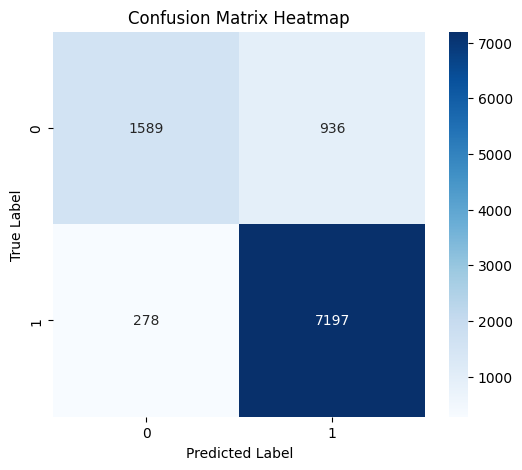

In [34]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()


## 📌 Step 33: Actual vs Predicted (Graphical Representation)

- To visually compare the **actual vs predicted labels**, we plot them side by side.  
- Each point represents a sample in the test dataset.  
- Black dots = **Actual Labels**  
- Blue crosses = **Predicted Labels**

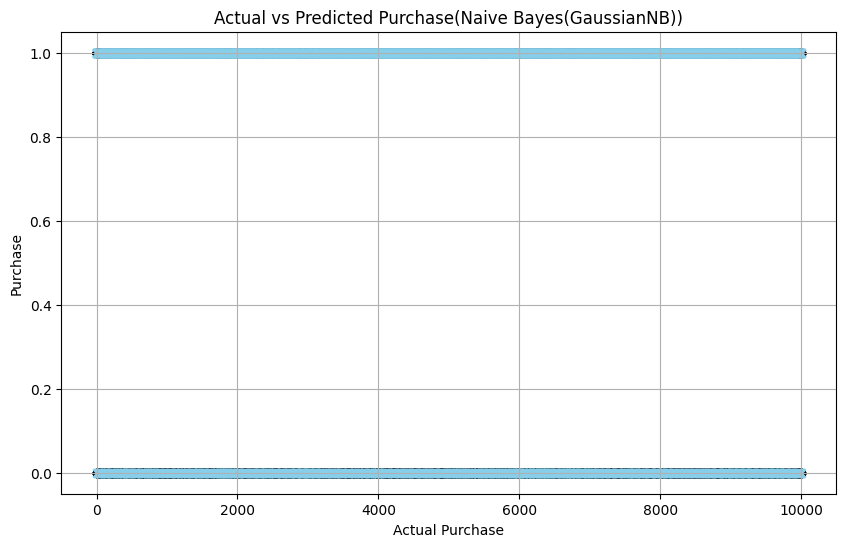

In [35]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color="black", label="Actual")
plt.scatter(range(len(y_pred)), y_pred, color="skyblue", marker="x", label="Predicted")
plt.xlabel("Actual Purchase")
plt.ylabel("Purchase")
plt.title("Actual vs Predicted Purchase(Naive Bayes(GaussianNB))")
plt.grid(True)
plt.show()

## Conclusion  

This notebook demonstrates a complete *Gaussian Naive Bayes Classification (GaussianNB) pipeline* using the ecommerce_dataset:  
- Data loading, exploration, and preprocessing.  
- Splitting into training/testing sets for model evaluation.  
- Model training using *Gaussian Naive Bayes (GaussianNB)*.  
- Evaluation with *accuracy, precision, recall, F1-score, and confusion matrix*.  
- Visualization via confusion matrix heatmap and actual-vs-predicted plots.  

---

### 🔍 Key Findings  
- The GaussianNB classifier achieved *~82.97% mean accuracy* across 5-fold cross-validation, with low variability (std ≈ 0.28).  
- The *confusion matrix*:  


indicates strong predictive performance, especially for the positive class.  
- On the test set:  
- **Accuracy = 87.86%**  
- **Precision = 88.49%**  
- **Recall = 96.28%**  
- **F1-score = 92.22%**  
- These metrics confirm *high recall and balanced precision*, showing the model is effective at capturing positive cases while maintaining acceptable false positives.  

---

### ✅ Recommendations Before Production Use  
1. Apply *hyperparameter tuning* (e.g., `var_smoothing`) with GridSearchCV/RandomizedSearchCV to optimize performance.  
2. Use *Stratified train/test split* and *StratifiedKFold* for more reliable evaluation on imbalanced datasets.  
3. Save the trained model, scaler, and encoders (`joblib.dump()`) for deployment and reproducibility.  
4. Add a requirements.txt file and structured folders (data/, notebooks/, models/) for better GitHub organization.  
5. Consider advanced evaluation with ROC curves, AUC, and per-class classification reports.  

---

# ✅ Final Conclusion  

In this project, we successfully implemented a *Gaussian Naive Bayes Classifier* on the ecommerce dataset, covering the complete workflow from *data preprocessing to model evaluation and visualization*.  

#### 🔑 Highlights:  
- 📊 Achieved *82.97% mean CV accuracy* and *87.86% test accuracy*.  
- 🧪 Confusion matrix confirmed excellent recall (96.28%) and balanced precision (88.49%).  
- 🔎 Precision, recall, and F1 metrics highlighted strong detection of positive cases.  
- ⚡ Visualizations (heatmap, confusion matrix) clearly demonstrated classification effectiveness.  

#### 💡 Implications:  
Gaussian Naive Bayes proved to be a *fast, interpretable, and effective algorithm* for this binary classification task. With fine-tuned hyperparameters, stratified evaluation, and proper deployment practices, its performance and reliability can be further improved. This makes Naive Bayes suitable for *ecommerce behavior analysis, purchase prediction, and other binary classification problems* in real-world applications.  

---

> ✅ Overall, this project provides a *well-documented, reproducible, and effective Naive Bayes classification pipeline*, making it a strong addition to your machine learning GitHub portfolio.
